<a href="https://colab.research.google.com/github/eleven111101/DBSCAN/blob/main/DBSCAN_Cluster.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [10]:
print("Hello_world")

Hello_world


In [11]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [12]:
X=pd.read_csv('DBSCAN.csv')

In [13]:
X

,f1,f2
0,3,3
1,3,4
2,5,3
3,5,5
4,6,4
5,10,14
6,12,15
7,13,11
8,12,12
9,21,5


In [14]:
from sklearn.preprocessing import StandardScaler


In [15]:
scaler = StandardScaler()

In [16]:
X = scaler.fit_transform(X)

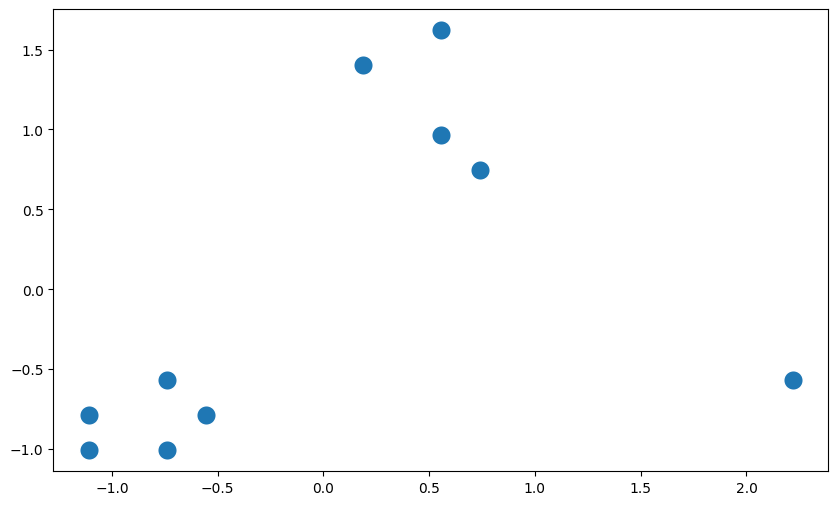

In [20]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x=X[:, 0], y=X[:, 1], s=200)  # Plotting first feature vs. second feature
plt.show()

In [21]:
from sklearn.cluster import DBSCAN

In [62]:
dbscan = DBSCAN(eps=1, min_samples=3)

In [63]:
dbscan.fit(X)

DBSCAN(eps=1, min_samples=3)

In [64]:
dbscan.labels_

array([ 0,  0,  0,  0,  0,  1,  1,  1,  1, -1])

In [66]:
from sklearn.neighbors import NearestNeighbors
nbrs = NearestNeighbors(n_neighbors=2)
nbrs.fit(X)
distances, indices = nbrs.kneighbors(X)

In [67]:
indices

array([[0, 1],
       [1, 0],
       [2, 4],
       [3, 4],
       [4, 2],
       [5, 6],
       [6, 5],
       [7, 8],
       [8, 7],
       [9, 7]])

In [68]:
distances

array([[0.        , 0.21905398],
       [0.        , 0.21905398],
       [0.        , 0.28675987],
       [0.        , 0.28675987],
       [0.        , 0.28675987],
       [0.        , 0.43008249],
       [0.        , 0.43008249],
       [0.        , 0.28675987],
       [0.        , 0.28675987],
       [0.        , 1.97970403]])

In [69]:
np.sort(distances, axis=0)

array([[0.        , 0.21905398],
       [0.        , 0.21905398],
       [0.        , 0.28675987],
       [0.        , 0.28675987],
       [0.        , 0.28675987],
       [0.        , 0.28675987],
       [0.        , 0.28675987],
       [0.        , 0.43008249],
       [0.        , 0.43008249],
       [0.        , 1.97970403]])

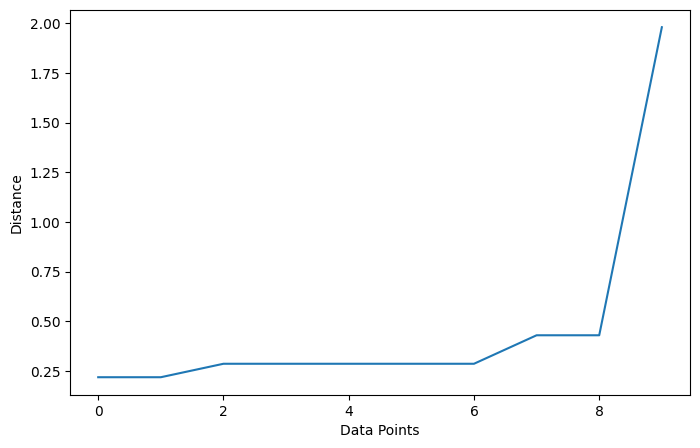

In [73]:
sorted_distances = np.sort(distances, axis=0)
plt.figure(figsize=(8, 5))
plt.plot(sorted_distances[:, 1])
plt.xlabel('Data Points')
plt.ylabel('Distance')
plt.show()

In [74]:
model = DBSCAN(eps=0.7, min_samples=4)
model.fit(X)

DBSCAN(eps=0.7, min_samples=4)

In [76]:
model.labels_

array([ 0,  0,  0,  0,  0,  1,  1,  1,  1, -1])

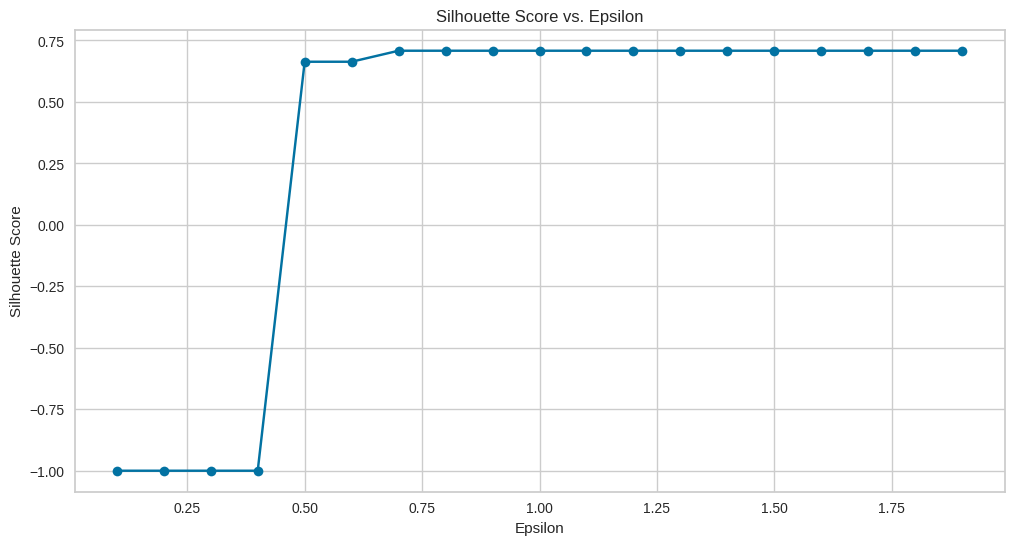

In [81]:
from sklearn.cluster import DBSCAN
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_score

# Scale the data
scaler = StandardScaler()
Scaled_X = scaler.fit_transform(X)

# Function to compute silhouette scores for different eps values
def plot_silhouette_scores(X, max_eps=2.0, step=0.1):
    eps_values = np.arange(0.1, max_eps, step)
    silhouette_scores = []

    for eps in eps_values:
        model = DBSCAN(eps=eps, min_samples=4)
        labels = model.fit_predict(X)
        if len(set(labels)) > 1:  # Ensure there are at least two clusters
            score = silhouette_score(X, labels)
        else:
            score = -1  # Silhouette score is not defined for a single cluster
        silhouette_scores.append(score)

    plt.figure(figsize=(12, 6))
    plt.plot(eps_values, silhouette_scores, marker='o')
    plt.xlabel('Epsilon')
    plt.ylabel('Silhouette Score')
    plt.title('Silhouette Score vs. Epsilon')
    plt.grid(True)
    plt.show()

# Plot silhouette scores
plot_silhouette_scores(Scaled_X)


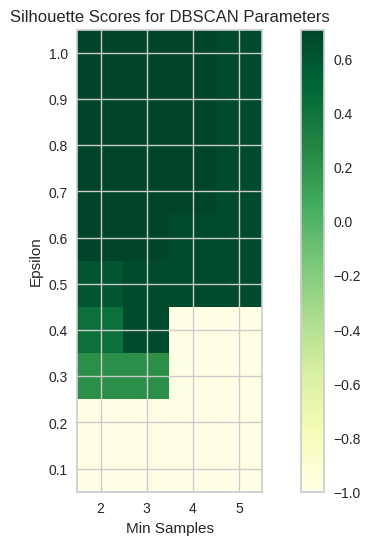

In [82]:
from sklearn.cluster import DBSCAN
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt
import numpy as np

# Scale the data
scaler = StandardScaler()
Scaled_X = scaler.fit_transform(X)

# Define range of eps and min_samples values to explore
eps_range = np.linspace(0.1, 1.0, 10)
min_samples_range = range(2, 6)

# Function to compute silhouette scores for different parameter combinations
def compute_silhouette_scores(X, eps_values, min_samples_values):
    scores = np.zeros((len(eps_values), len(min_samples_values)))

    for i, eps in enumerate(eps_values):
        for j, min_samples in enumerate(min_samples_values):
            model = DBSCAN(eps=eps, min_samples=min_samples)
            labels = model.fit_predict(X)
            if len(set(labels)) > 1:  # Ensure there are at least two clusters
                score = silhouette_score(X, labels)
            else:
                score = -1  # Silhouette score is not defined for a single cluster
            scores[i, j] = score

    return scores

# Compute silhouette scores
silhouette_scores = compute_silhouette_scores(Scaled_X, eps_range, min_samples_range)

# Plot heatmap of silhouette scores
plt.figure(figsize=(10, 6))
plt.imshow(silhouette_scores, interpolation='nearest', cmap=plt.cm.YlGn, origin='lower')
plt.colorbar()
plt.xticks(np.arange(len(min_samples_range)), min_samples_range)
plt.yticks(np.arange(len(eps_range)), np.round(eps_range, 2))
plt.xlabel('Min Samples')
plt.ylabel('Epsilon')
plt.title('Silhouette Scores for DBSCAN Parameters')
plt.show()
